---

# **Modelo de aprendizado de máquina para detecção oportuna de câncer de mama.**

por [Carlos Andrés Soto Espinosa](https://www.kaggle.com/code/andresespinosa307/machine-learning-e-c-ncer-de-mama)

---



**Contexto:**

No passado, o diagnóstico tradicional de câncer de mama era realizado por meio de um procedimento cirúrgico. Hoje em dia a biópsia de aspiração por agulha fina (FNA) é uma maneira de examinar pequenas quantidades de tecido tumoral.

Essas amostras são examinadas para obter as características das células individuais e propriedades contextuais importantes, como o tamanho dos grumos da célula. Analisando essas características a biópsia de aspiração por agulha fina., é possível diagnosticar com sucesso usando se um cancer é Benigno ou Maligno a biópsia de aspiração por agulha fina.

A seguir vamos treinar um modelo supervisionado de Machine Learning para automatizar esse proceso de avaliação e classificação das caraterísticas das amostras para indicar se elas são Benignas ou Malignas. Para finalmente aportar uma ferramenta muito útil.

# Carregando e abrindo o arquivo:

In [11]:
import requests
# URL do dataset
url = 'https://www.kaggle.com/api/v1/datasets/download/yasserh/breast-cancer-dataset'
# Fazer o download do arquivo
response = requests.get(url)
# Salvar o arquivo no formato apropriado (por exemplo, zip ou csv)
with open('breast_cancer_dataset.zip', 'wb') as file:
    file.write(response.content)

In [12]:
import zipfile

# Extrair o arquivo ZIP
with zipfile.ZipFile('breast_cancer_dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('breast_cancer_dataset')


In [17]:
import pandas as pd

# Carregar o dataset de um arquivo CSV
df = pd.read_csv('breast_cancer_dataset/breast-cancer.csv')  # Substitua 'nome_do_arquivo.csv' pelo nome real do arquivo

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### **1. Análise exploratória**

* Importando bibliotecas:

In [18]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* Visualizando os dados:

In [19]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


* Todas as características do conjunto de dados:

In [20]:

df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

* Verificando se existem valores nulos:

In [21]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


* Vamos fazer uma Análise exploratória utilizando gráficos  para entender melhor a relação entre os atributos e a variável resposta.

**1.1 Entendendo a Variável Resposta (diagnosis):**


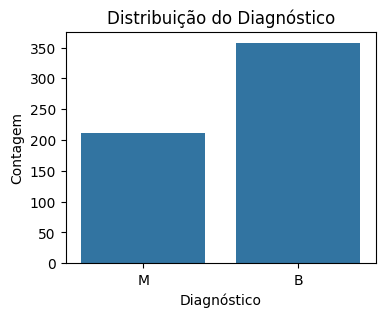

In [24]:
# 1. Análise da Variável Resposta
plt.figure(figsize=(4, 3))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribuição do Diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('Contagem')
plt.show()



>No grafico acima podemos ver melhor que os casos Benignos superam os casos Malignos.



**1.2 Distribuição dos Atributos Numéricos por Diagnóstico**

*Com a ajuda de um gráfico de Box Plots podemos melhor visualizar a mediana, quartis, outliers e a dispersão dos dados para cada grupo:*
> O atributo `Radius Mean` parece ser um bom preditor porque as caixas estão bem separadas em sua distribuição.

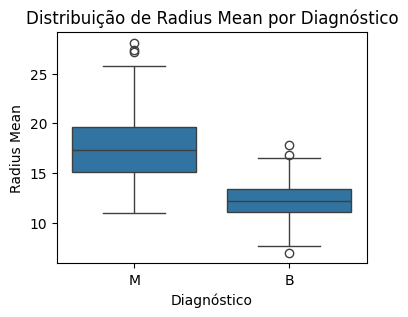

In [25]:
# 2. Distribuição dos Atributos Numéricos por Diagnóstico (Exemplo para 'radius_mean')
plt.figure(figsize=(4, 3))
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title('Distribuição de Radius Mean por Diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('Radius Mean')
plt.show()

**1.3 Histograms sobrepostos ou KDE Plots (Kernel Density Estimate):**
* Os picos e a forma das distribuições são diferentes para "M" e "B", o que indica que o atributo é bem discriminativo para diferenciar se um tumor é Benigno ou Maligno.

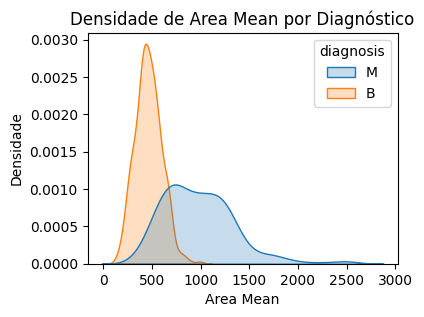

In [26]:
# Exemplo para KDE Plot de 'area_mean'
plt.figure(figsize=(4, 3))
sns.kdeplot(data=df, x='area_mean', hue='diagnosis', fill=True, common_norm=False)
plt.title('Densidade de Area Mean por Diagnóstico')
plt.xlabel('Area Mean')
plt.ylabel('Densidade')
plt.show()

**1.4 Correlação entre Atributos Numéricos:**

Com esse Heatmap podemos entender a inter-relação entre os atributos numéricos:

* Vemos que há uma forte relação linear positiva entre alguns pares de variáveis de 1 e muito próximos também.



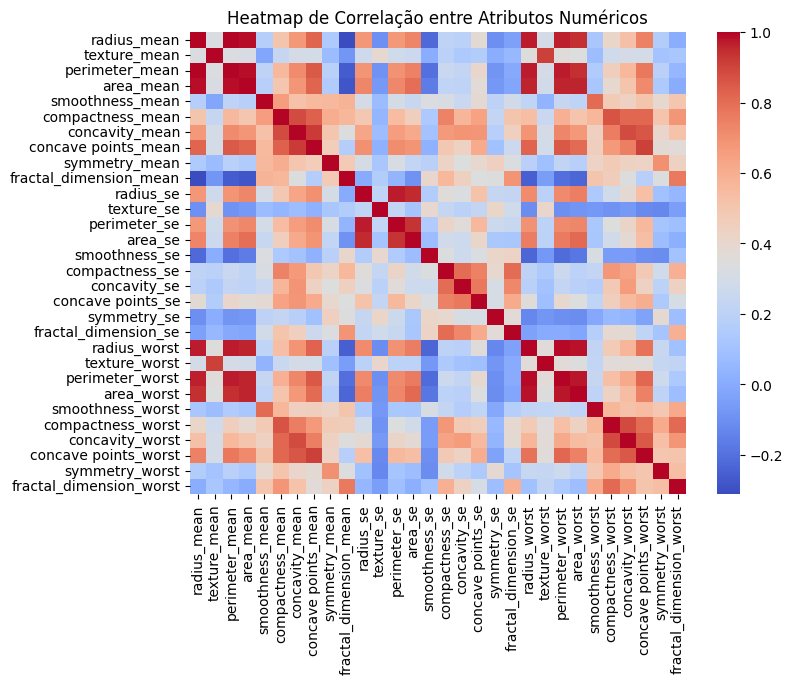

In [27]:
df_numeric = df.drop(['id', 'diagnosis'], axis=1)
matriz= df_numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=False, cmap='coolwarm')
plt.title('Heatmap de Correlação entre Atributos Numéricos')
plt.show()


**1.5 Relação entre Pares de Atributos Numéricos e Diagnóstico (Exemplo com Pair Plot):**

 Em base ao grafico de Heatmap anterior escolhí algumas variaveis para relacionar em par, sendo 3 delas com uma forte inter-relação positiva e outra mais fraca. Somente para entender melhor.  
 Assim identificamos cómo essas correlações se manifestam em relação ao diagnóstico.
 Ao colorir os pontos de acordo com o diagnóstico, podemos observar se as classes se agrupam de forma diferente em um espaço bidimensional. Pontos "M" e "B" formam clusters distintos.



* Vemos como os 3 variáveis com forte correlação linear pisitiva forman graficos lineares quasse perfeitos, alguns um pouco parabólicos no final da reta.
* Justamente os graficos com a variável `smoothness_mean` não tem correlação com as outras variáveis.
* Muito importante destacar que em todos eles os pontos com os valores Benignos e os Malignos formam uma clara distinção de rangos, e clusters diferentes, mostram uma clara separação entre os tipos de tumor.




<Figure size 800x600 with 0 Axes>

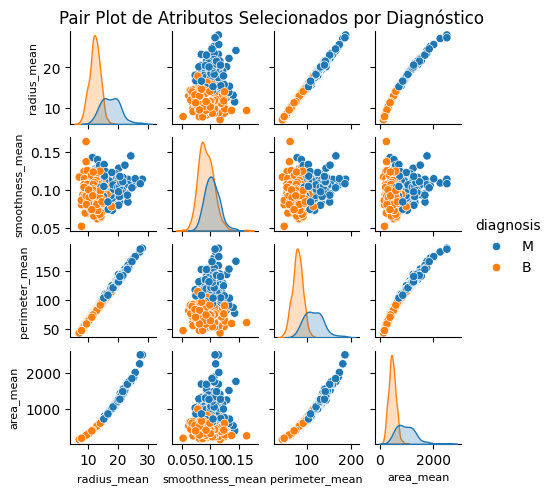

In [29]:
cols_para_pairplot = ['radius_mean', 'smoothness_mean', 'perimeter_mean', 'area_mean', 'diagnosis']
plt.figure(figsize=(8, 6))
g = sns.pairplot(df[cols_para_pairplot], hue='diagnosis', diag_kind='kde',height=1.2)
plt.suptitle('Pair Plot de Atributos Selecionados por Diagnóstico', y=1.02) # Ajusta o título para não sobrepor

# Ajustando o tamanho das etiquetas nos eixos
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)  # Ajuste o tamanho da etiqueta do eixo X
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Ajuste o tamanho da etiqueta do eixo Y

plt.show()

**Conclusão:**

> O gráficos indicam que algumas características podem ajudar na identificação entre um câncer maligno e benigno, com distinções mais claras em alguns pares de atributos.





### **2. Treino/Teste**

* Aquí vou separar a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes.

In [31]:
from sklearn.model_selection import train_test_split

predictors_train, predictors_test, target_train, target_test = train_test_split(
    df.drop(['diagnosis'], axis=1),
    df['diagnosis'],
    test_size=0.34,
    random_state=123
)

## 3\. Modelagem

### **3.1. Treino**

* Treino o modelo de **árvore de decisão** com os **dados de treino** (2/3), Gerando o gráfico da árvore do modelo treinado.

In [32]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model = model.fit(predictors_train, target_train)

In [33]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'monotonic_cst': None,
 'feature_names_in_': array(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
        'smoothness_mean', 'compactness_mean', 'concavity_mean',
        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        'radius_se', 'texture_se', 'perimeter_se', 'area_se',
        'smoothness_se', 'compactness_se', 'concavity_se',
        'concave points_se', 'symmetry_se', 'fractal_dimension_se',
        'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
        'smoothness_worst', 'compactness_worst', 'concavity_worst',
        'concave points_worst', 'symmetry_worst',
        'fractal_dimension_worst'], dtype=object),
 'n_features_in_':

> Vemos que a Árvore de decisão tem **17 folhas**.

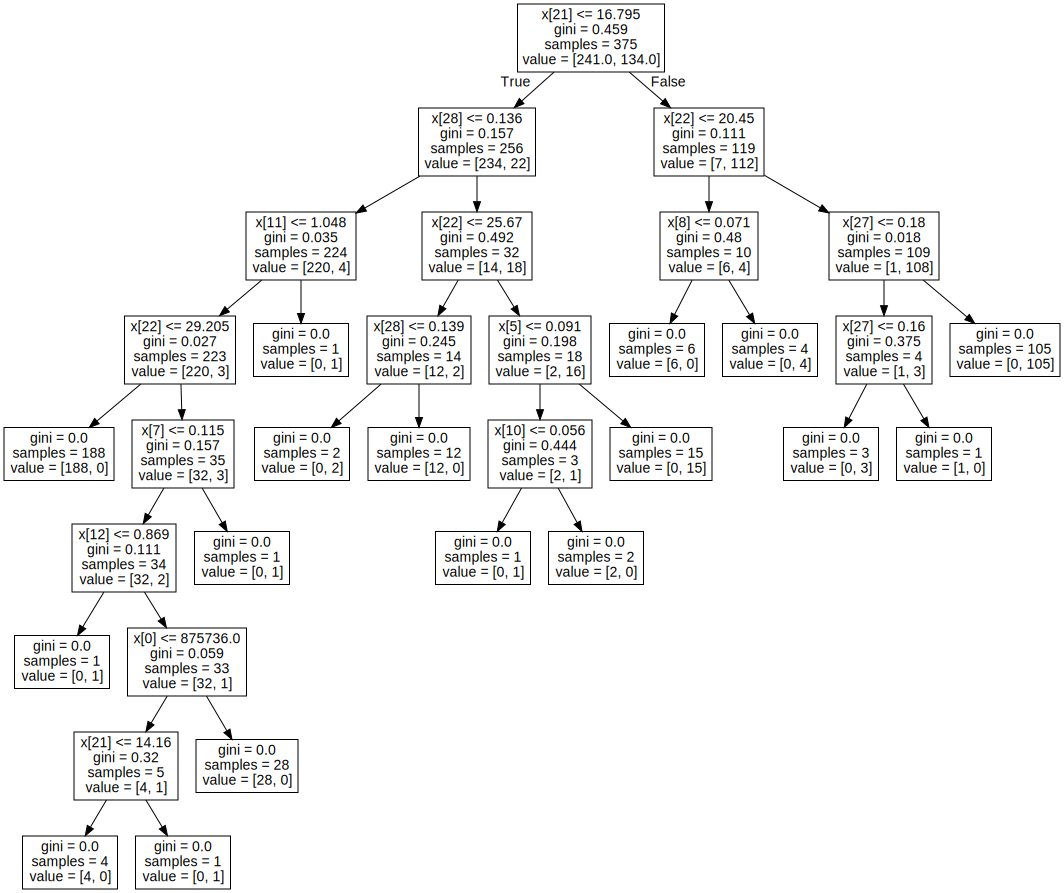

In [34]:
import graphviz
from sklearn import tree

tree_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(tree_data)
graph

### **3.2. Avaliação**

**a. Matriz de Confusão:**

Aquí calculamos e visualizamos a **matriz de confusão** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3).

**Comentário:**
* O modelo acertou 184 vezes de 194 predições ao todo.
* O modelo teve 110 Verdaderos Positivos (TP) para o tipo "Benigno". Com 6 Falsos Positivos (FP).
* Para o tipo "Maligno" o modelo obteve 74 Verdaderos Negativos (TN). Com 4 Falsos Negativos (FN).

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

target_predicted = model.predict(predictors_test)

confusion_matrix = confusion_matrix(target_test, target_predicted)
print(confusion_matrix)

[[110   6]
 [  4  74]]


* Vamos facilicar a visualização da matriz de confusão em um gráfico de mapa de calor, feito com um método do pacote Scikit-Learn:

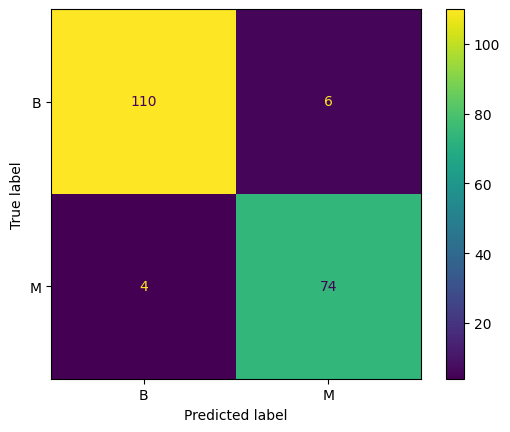

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(model, predictors_test, target_test)
plt.show()

* Total de Predições:

In [ ]:
total = confusion_matrix.sum()
print(total)

194


* Total de Acertos:

In [ ]:
acertos = np.diag(confusion_matrix).sum()
print(acertos)

184


**b. Acurácia:**

Calculamos a **acurácia** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3).

Calculando a Acuracia com o pacote Scikit-Learn:

In [ ]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(target_test, target_predicted)

print(f"{round(100 * acuracia, 2)}%")

94.85%




> Conseguimos uma Acurácia de 94.85% para o modelo.



## 4\. Predição  

### **4.1. Novo caso**

* A seguir vou escolher uma linea aleatoriamente do nosso dataframe para simular os dados entrarntes de um "caso novo" a modo de exemplo de como seria utilizado o modelo na prãtica:

In [ ]:
caso_novo = df.iloc[[402]]

caso_novo = caso_novo.drop(['diagnosis'], axis=1)
model.predict(caso_novo)

array(['B'], dtype=object)

> **Resultado:** Para os dados da amostra desse "novo caso" obtemos o valor **Benigno**.
Que é uma ótima notícia para a paciente.

# 5. Conclusão:

>Os resultados são muito muito bons. Nosso modelo teve 94,85%, que é muito alentador. Mesmo assim somente os expertos na area médica para avaliar melhor e verificar qual seria o custo dos Falsos Positivos e Falsos Negativos dados pelo nosso modelo na prática real.

>A modo de estudo esse trabalho é muito alentador sobre as aplicações praticas de uma tecnologia como essa. Além da eficiencia, a redução de custos, tempo e possivelmente a logistica também.







---

